# **Case study 01**



---





# Preprocessing training data

# Importing the required libraries

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load the required dataset(train_loan.csv)

In [142]:
data = pd.read_csv('train_loan.csv')

# Understanding the dataset

In [143]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [144]:
data.shape

(614, 13)

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [146]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Missing value handling

In [147]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Analyzing the data distribution of 'LoanAmount'

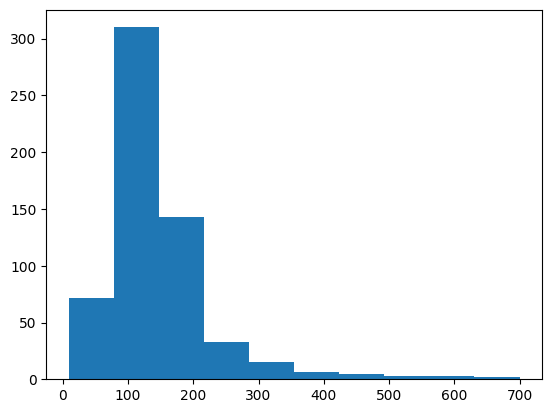

In [148]:
plt.hist(data['LoanAmount'])
plt.show()

# Handling the missing values by finding the median. Hence it is a right skewed data set

In [149]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())

# Analyzing the data distribution of 'Credit_History' and handling the missing values

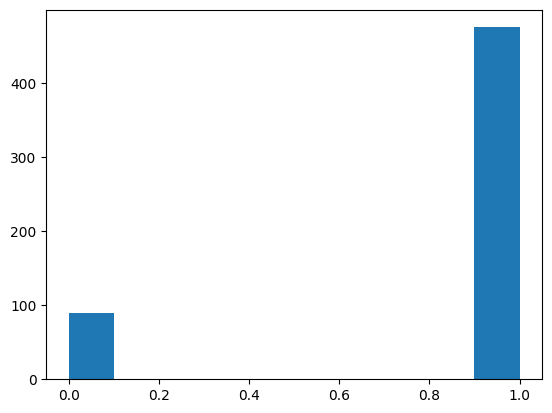

In [150]:
plt.hist(data['Credit_History'])
plt.show()

In [151]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode().iloc[0])

# Analyzing the data distribution of 'Loan_Amount_Term' and handling the missing values

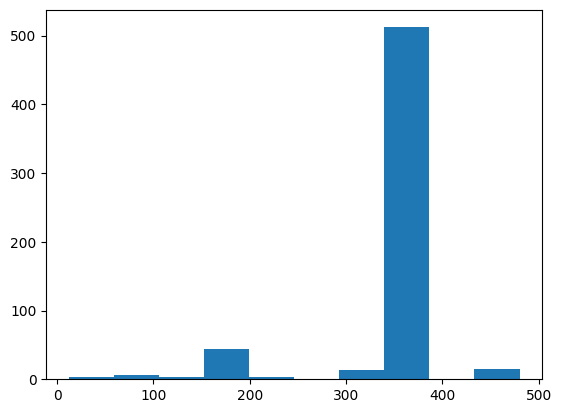

In [152]:
plt.hist(data['Loan_Amount_Term'])
plt.show()

In [153]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())

# Analyzing the data distribution of Gender,Married,Self_Employed & Dependents and handling the missing values

In [154]:
data ['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [155]:
data ['Gender'] =data['Gender'].fillna('Male')

In [156]:
data ['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [157]:
data ['Married'] =data['Married'].fillna('Yes')

In [158]:
data ['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [159]:
data ['Self_Employed'] =data['Self_Employed'].fillna('No')

In [160]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [161]:
data['Dependents'] = data['Dependents'].str.replace('+','')

<ipython-input-161-e7493c2d1d37>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Dependents'] = data['Dependents'].str.replace('+','')


In [162]:
data['Dependents'].unique()

array(['0', '1', '2', '3', nan], dtype=object)

In [163]:
data['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [164]:
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].median())

# Checking the missing value handling is successful or not

In [165]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Identifying the outliers and handling them

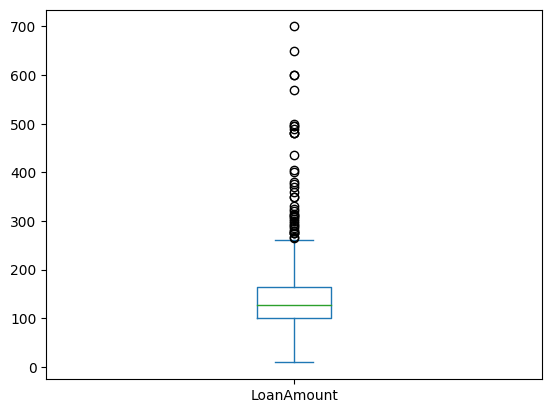

In [166]:
data['LoanAmount'].plot(kind='box')
plt.show()

In [167]:
Q1 = data['LoanAmount'].quantile(0.25)
Q2 = data['LoanAmount'].quantile(0.5)
Q3 = data['LoanAmount'].quantile(0.75)

In [168]:
IQR = Q3-Q1
low = Q1 - (1.5*IQR)
up = Q3 + (1.5*IQR)
print(low,up)

3.5 261.5


In [169]:
data[(data['LoanAmount']<low) | (data['LoanAmount']>up)].index

Int64Index([  5,   9,  21,  34,  54,  67,  83, 126, 130, 135, 155, 161, 171,
            177, 233, 253, 258, 260, 278, 308, 324, 325, 333, 351, 369, 372,
            381, 391, 409, 432, 487, 506, 514, 523, 525, 536, 561, 572, 592,
            600, 604],
           dtype='int64')

# Dealing the outliers with Flooring and Capping method

In [170]:
floor_value = 100
cap_value = 500

In [171]:
data['LoanAmount'] = data['LoanAmount'].apply(lambda x:
                                             max(floor_value, min(x, cap_value)))

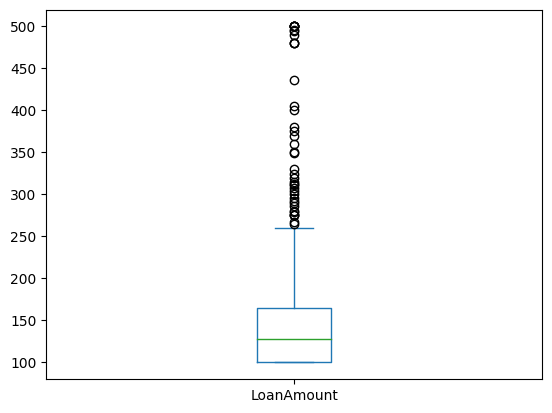

In [172]:
data['LoanAmount'].plot(kind='box')
plt.show()

In [173]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#Label encoding

In [174]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [175]:
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])

In [176]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,100.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [177]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

#**Onehot encoding**

In [178]:
data = pd.get_dummies(data)

In [179]:
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,...,Dependents_1,Dependents_2,Dependents_3,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,100.0,360.0,1.0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,0,0,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


# Scaling using Standardiztion

In [180]:
from sklearn.preprocessing import StandardScaler

In [181]:
req_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Credit_History']

In [182]:
x = data[req_cols]
y = data['Loan_Status']

In [183]:
sc = StandardScaler()

In [184]:
x.loc[:,['LoanAmount','Loan_Amount_Term']] = sc.fit_transform(x[['LoanAmount','Loan_Amount_Term']])

<ipython-input-184-17df6469e2b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.loc[:,['LoanAmount','Loan_Amount_Term']] = sc.fit_transform(x[['LoanAmount','Loan_Amount_Term']])


In [185]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,-0.310954,0.273231,1.0
1,4583,1508.0,-0.310954,0.273231,1.0
2,3000,0.0,-0.693079,0.273231,1.0
3,2583,2358.0,-0.420132,0.273231,1.0
4,6000,0.0,-0.133539,0.273231,1.0
